## PCA(Principal Component Analysis)

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


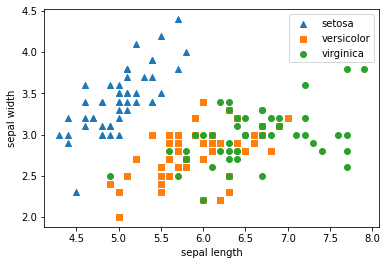

In [3]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


### PCA적용하기 전에 개별 속성을 함께 스케일링.

In [4]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit(입력 데이터 세트)  transform(입력 데이터 세트)를 호출해 PCA 변환.
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca.shape

(150, 2)

In [14]:
columns = [ 'pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=columns)
irisDF_pca['target'] = iris.target
irisDF_pca


,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
...,...,...,...
145,2.233024,0.389352,2
146,1.966862,-0.896264,2
147,1.928996,0.268890,2
148,1.806149,1.009217,2


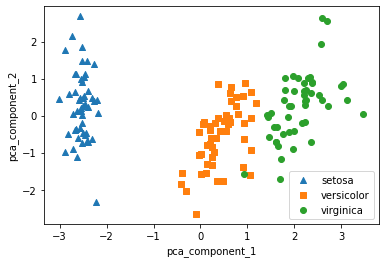

In [18]:
markers = ['^','s','o']

for i , marker in enumerate (markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [19]:
pca.explained_variance_ratio_ #두개의 피처로 촏 변동성의 95% 설명 

array([0.76740358, 0.18282727])

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=777)
scores = cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
scores

array([0.98, 0.94, 0.98])

### 더 좋은 정확도.

In [22]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
scores_pca

array([0.98, 0.98, 1.  ])

## 다른 데이터의 PCA

In [26]:

import pandas as pd

df = pd.read_excel('credit_card.xls', sheet_name='Data',header=1)
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [27]:
df.rename(columns={'PAY:0':'PAY_1','default payment next month':'default'},inplace=True)
y_target = df['default']
X_features = df.drop('default',axis=1)

### 상관관계가 높은 피쳐들은 소수의  PCA만으로도 자연스럽게 속성들의 변동성 수용 가능.

<AxesSubplot:>

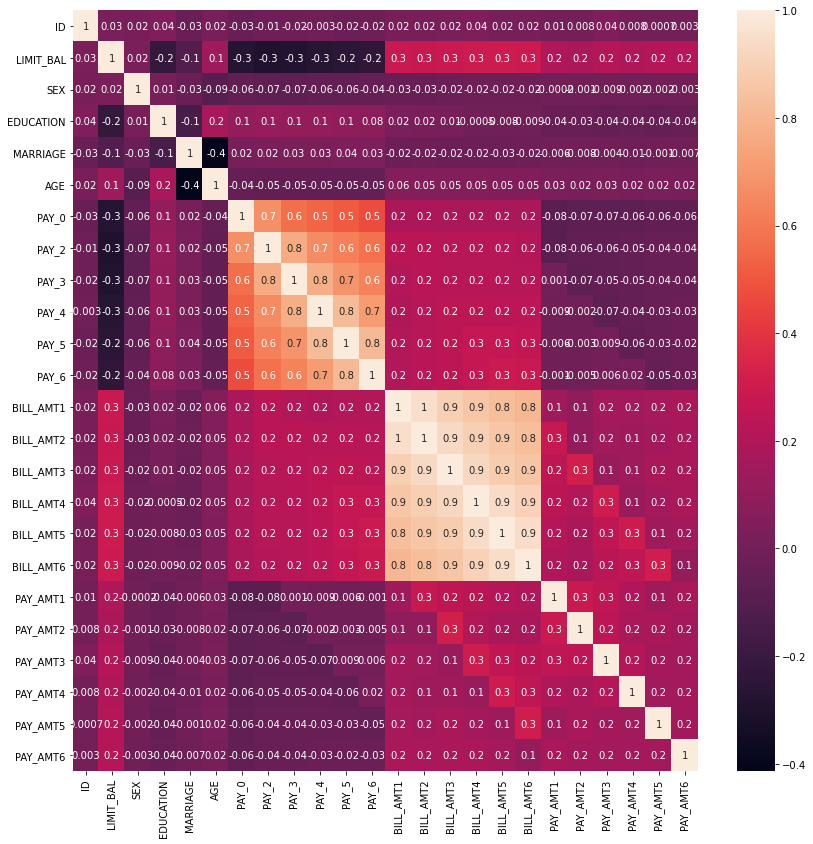

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성.
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print("대상 속성명 :",cols_bill)

#2개의 PCA속성을 가진 PCA객체 생성하고 , explained_variance_ratio_계산을 위해 fit()호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print("PCA Component별 변동성:", pca.explained_variance_ratio_)

대상 속성명 : ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


### 원본 데이터 세트 6개와 6개의 컴포넌트로 PCA 변환한 데이터세트의 분류 예측 결과 

In [32]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300,random_state=777)
scores = cross_val_score(rcf,X_features,y_target,scoring='accuracy',cv=3)

print('CV=3 인 경우의 개별 Fold세트별 정확도',scores)
print('평균 정확도 : {:.3f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도 [0.2554 0.8212 0.79  ]
평균 정확도 : 0.622


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf,df_pca,y_target,scoring='accuracy',cv=3)

print("CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도",scores_pca)
print("PCA 변환 데이터 세트 평균 정확도 :",np.mean(scores_pca))


CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도 [0.7795 0.7985 0.8049]
PCA 변환 데이터 세트 평균 정확도 : 0.7942999999999999


## LDA(Linear Discriminant Analysis)

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


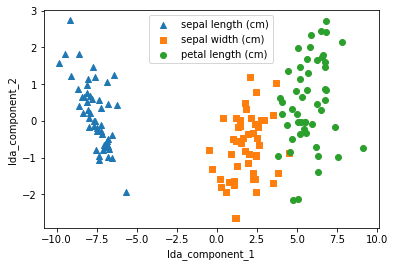

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda , columns = lda_columns)
irisDF_lda['target'] = iris.target

markers=[ '^','s','o']

for i,marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
    
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.feature_names[i])
    
    
plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

    
    

## SVD(Singular Value Decomposition)

In [39]:
import numpy as np
from numpy.linalg import svd

#4 4 랜덤 행렬 생성.
np.random.seed(777)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.468 -0.823 -0.065 -0.713]
 [ 0.906  0.766  0.826 -1.324]
 [-1.752  1.002  0.545  1.895]
 [-0.769 -1.403 -0.632 -0.559]]


In [40]:
# SVD를 적용해 U Sigma Vt 도출.
U , Sigma , Vt = svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print("U matrix:\n",np.round(U,3))
print("Sigma Value:\n",np.round(Sigma,3))
print("V transpose matrix:\n",np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[ 0.179 -0.371 -0.538 -0.735]
 [ 0.386  0.584 -0.657  0.28 ]
 [-0.89   0.047 -0.445  0.085]
 [ 0.162 -0.721 -0.284  0.612]]
Sigma Value:
 [3.124 2.374 1.044 0.084]
V transpose matrix:
 [[ 0.545 -0.311 -0.09  -0.774]
 [ 0.495  0.763  0.416 -0.007]
 [ 0.626 -0.104 -0.546  0.546]
 [-0.257  0.557 -0.721 -0.321]]


### Truncated SVD

 > Sigma에 있는 대각 원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식.

Text(0, 0.5, 'TruncatedSVD Component 2')

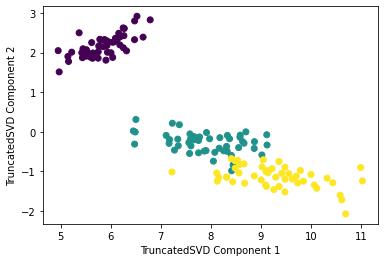

In [42]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel("TruncatedSVD Component 1")
plt.ylabel("TruncatedSVD Component 2")

### PCA 와 TruncatedSVD 클래스 구현을보면 두 개 모두 SVD를 이용해 행렬분해.

> 붗꽃데이터를 스케일링으로 변환한 뒤에 PCA , TruncatedSVD 클래스 변환을 해보면 거의 동일함.

Text(0.5, 1.0, 'PCA Transformed')

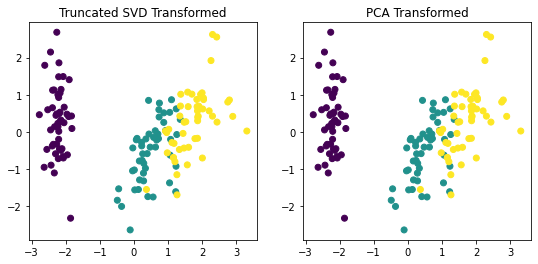

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)


tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)


pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)


fig , (ax1,ax2) = plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')


## NMF(Non-Negative Matrix Factorization)

/Users/leejunseung/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/Users/leejunseung/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0, 0.5, 'NMF Component 2')

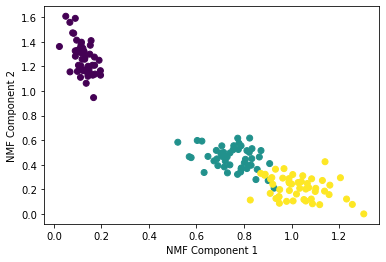

In [45]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)

nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')